# Implementation Questions

### Question 1
###  In this question, you are tasked with implementing color clustering for an image using k-means from scikit-learn. Consider the following image of a bird (you have to use the original "bird.png" image attached with the assignment files):

In [1]:
import numpy
import torchvision
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

device = "cuda:0"


In [2]:
def plot_color_space(_rgb: numpy.ndarray, _title:str=None, _hold:bool=None, **kwargs):
    if _hold:
        ax = plt.gca()
    else:
        fig = plt.figure(figsize=(14,14))
        ax = fig.add_subplot(111, projection="3d")

    kwargs.setdefault("alpha", 1.0)

    ax.scatter(*_rgb.T, **kwargs)

    ax.set_xlabel("R", color="r", fontweight="bold", fontsize=15)
    ax.set_ylabel("G", color="g", fontweight="bold", fontsize=15)
    ax.set_zlabel("B", color="b", fontweight="bold", fontsize=15)

    if _title is not None:
        ax.set_title(_title)


#### a) Normalize the image through division by the maximum possible value.

In [3]:
bird_img = torchvision.io.read_image("bird.png", torchvision.io.ImageReadMode.RGB).to(device)
bird_img = numpy.array(bird_img.cpu(), dtype=numpy.float64) / 255
bird_img = numpy.moveaxis(bird_img, 0, 2)
image_array = bird_img.reshape((-1, 3))


C:\Users\Trim\AppData\Local\Temp\ipykernel_18856\4221516283.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  bird_img = numpy.array(bird_img.cpu(), dtype=numpy.float64) / 255


#### b) Plot the original normalized image as well as the color space of the image. You can refer to the Appendix for a sample function to plot color spaces.

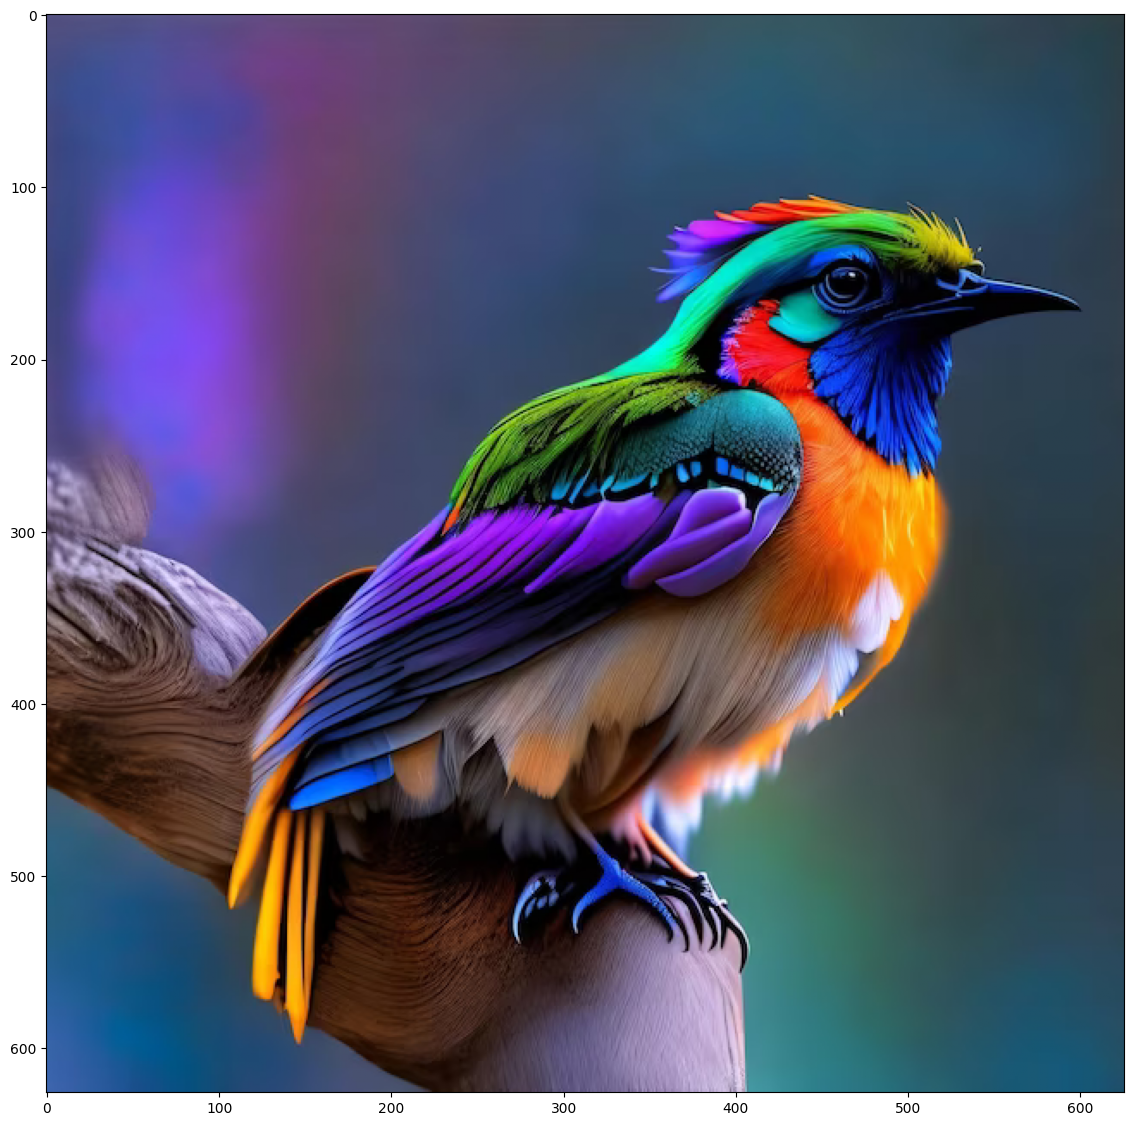

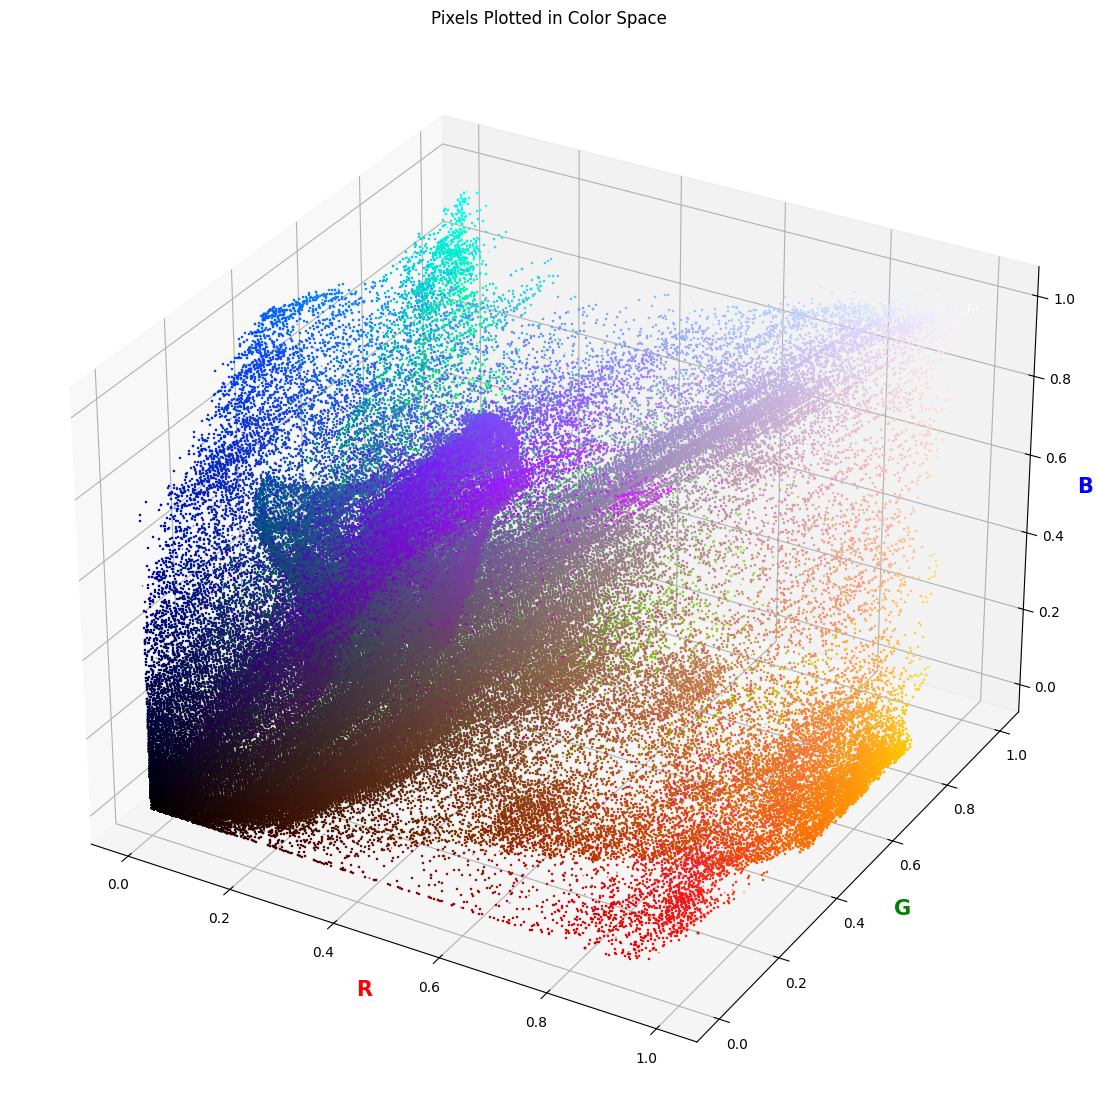

In [4]:
plt.figure(figsize=(14,14))

plt.imshow(bird_img)

plt.show()

plot_color_space(image_array, _title="Pixels Plotted in Color Space", c=image_array, s=0.5, marker="s")

plt.show()


#### c) Apple k-means clustering with K=5 and K=10 to the image colors. For each case, plot the color space of the centroids and their corresponding colors (each plot should have K colored points).

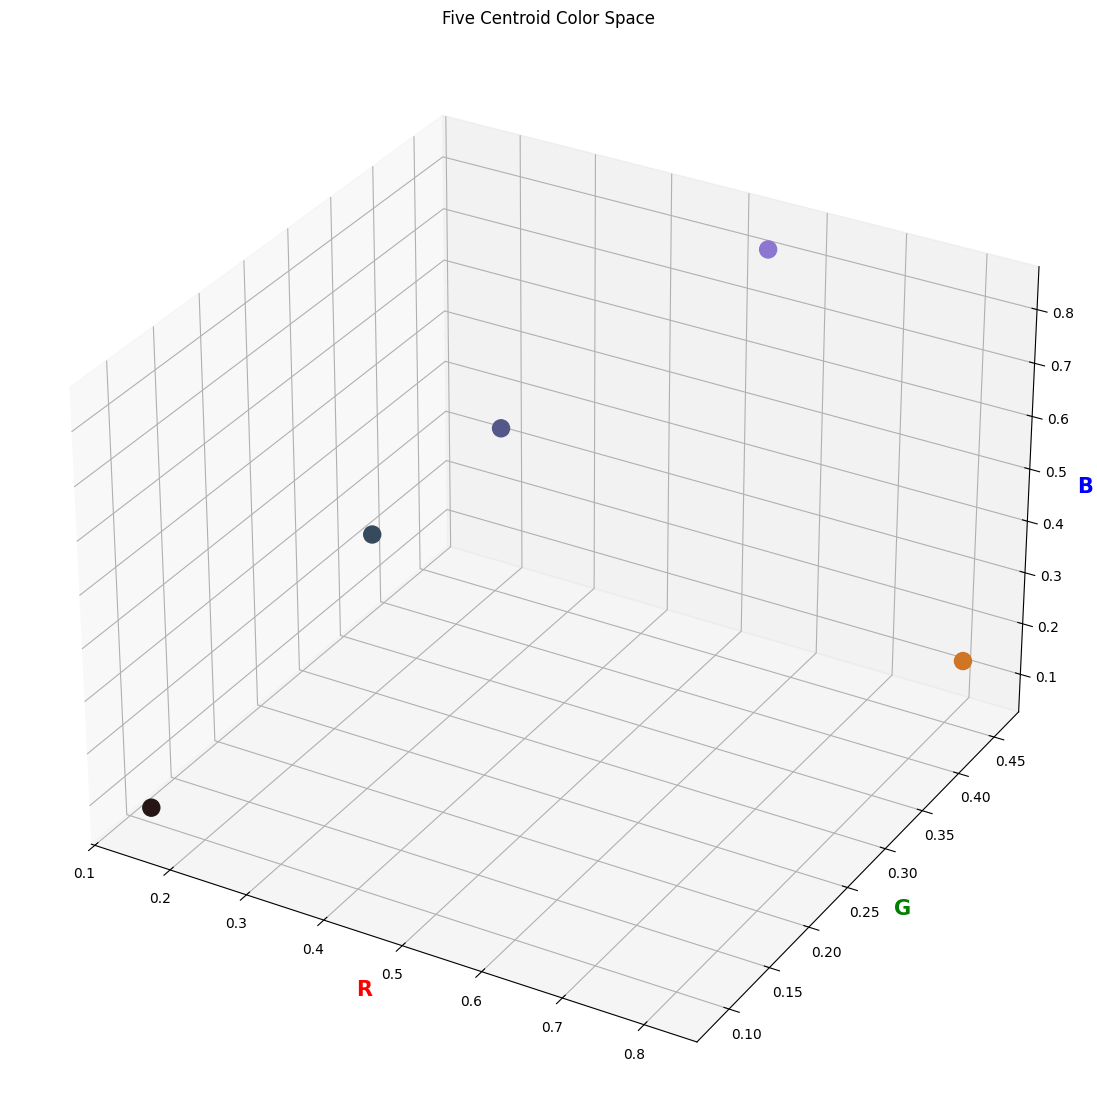

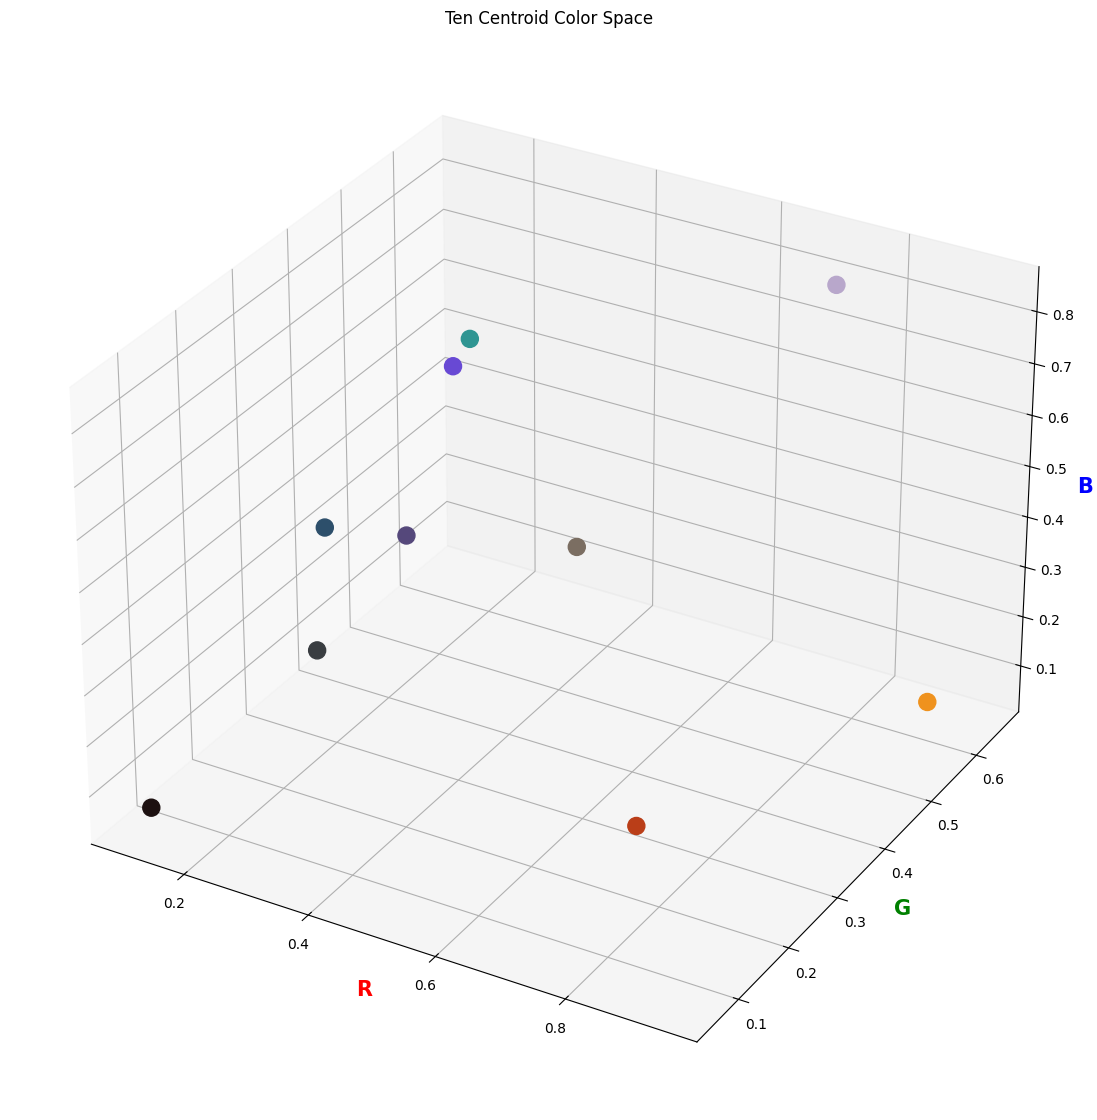

In [5]:
five_cluster_means = KMeans(5, random_state=42)
five_cluster_labels = five_cluster_means.fit_predict(image_array)
plot_color_space(five_cluster_means.cluster_centers_, "Five Centroid Color Space", c=five_cluster_means.cluster_centers_, s=150, marker="o")

plt.show()

ten_cluster_means = KMeans(10, random_state=42)
ten_cluster_labels = ten_cluster_means.fit_predict(image_array)
plot_color_space(ten_cluster_means.cluster_centers_, "Ten Centroid Color Space", c=ten_cluster_means.cluster_centers_, s=150, marker="o")

plt.show()


#### d) For each K, recolor the image according to the centroids, where each pixel takes the color of its cluster centroid. For each K, plot the color space showing the centroids and the distribution of recolored pixels. 

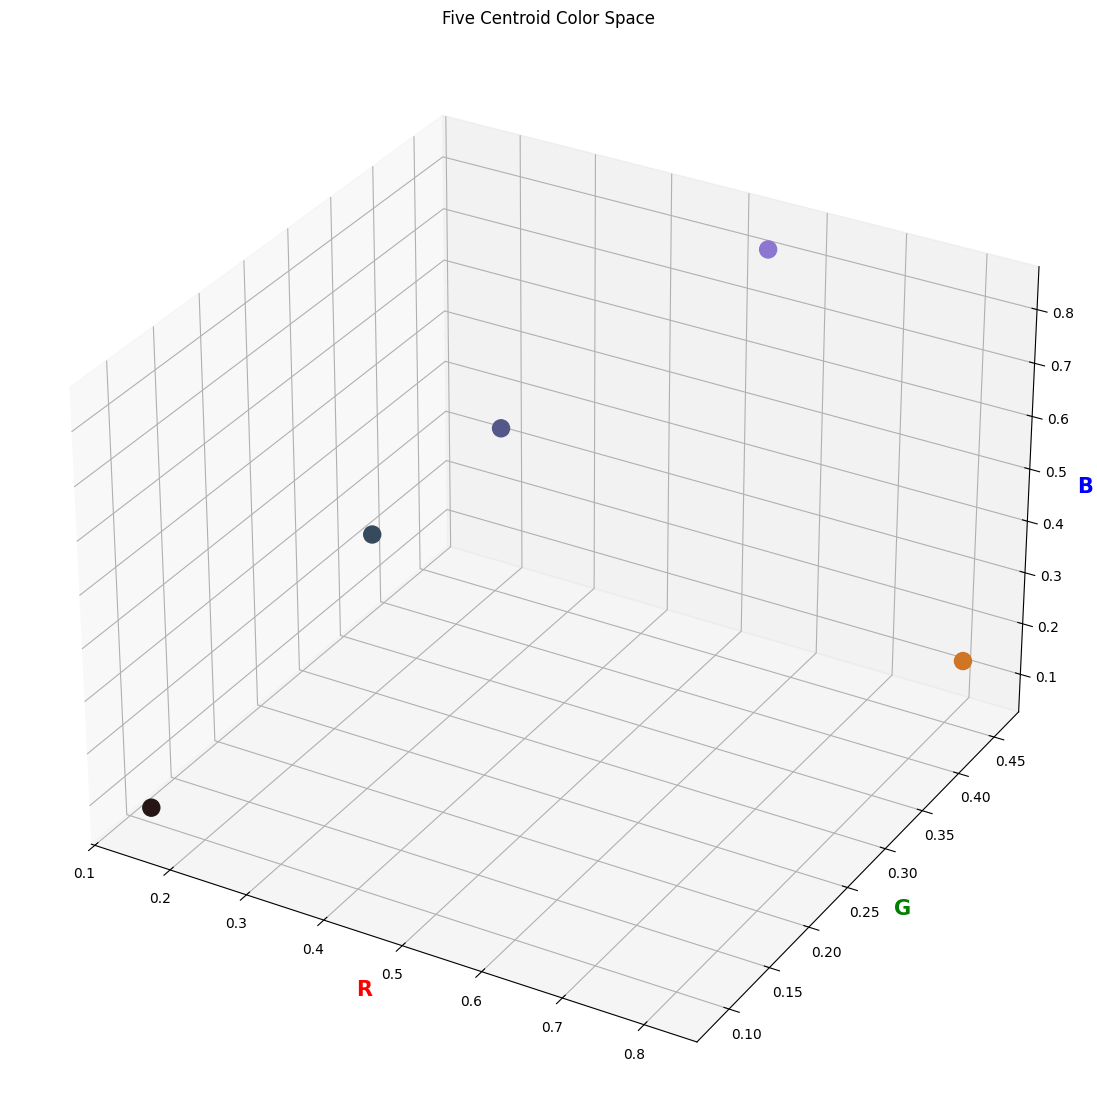

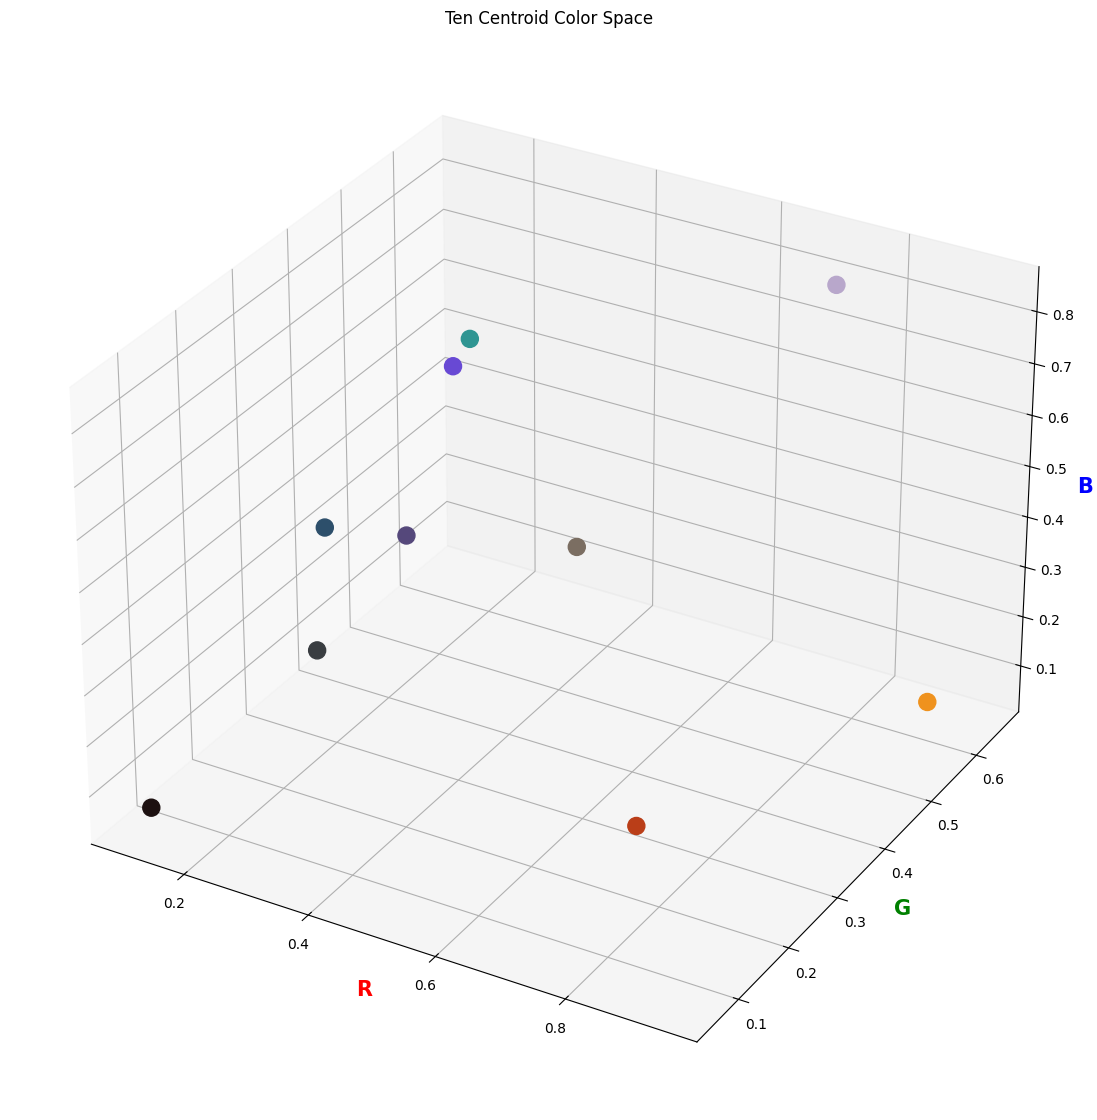

In [6]:
five_cluster_data = five_cluster_means.cluster_centers_[five_cluster_labels]

plot_color_space(five_cluster_means.cluster_centers_, "Five Centroid Color Space", c=five_cluster_means.cluster_centers_, s=150, marker="o")

plot_color_space(five_cluster_data, c=five_cluster_data, _hold=True, s=0.5, marker="s")

plt.show()

ten_cluster_data = ten_cluster_means.cluster_centers_[ten_cluster_labels]

plot_color_space(ten_cluster_means.cluster_centers_, "Ten Centroid Color Space", c=ten_cluster_means.cluster_centers_, s=150, marker="o")

plot_color_space(ten_cluster_data, c=ten_cluster_data, _hold=True, s=0.5, marker="s")

plt.show()


#### e) Plot the recolored image, for each K, showing the bird in the new clustered colors.

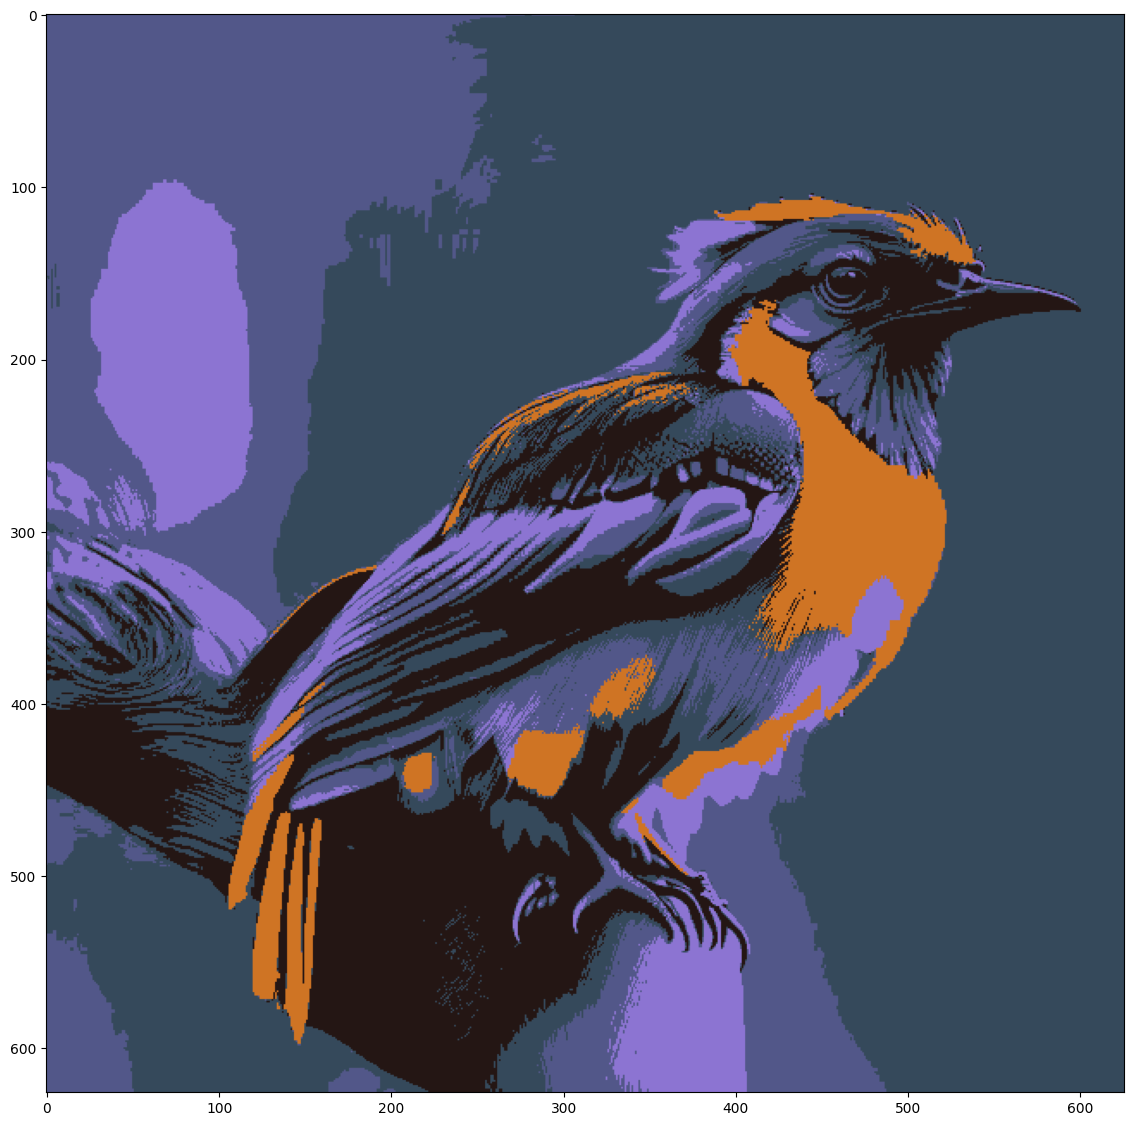

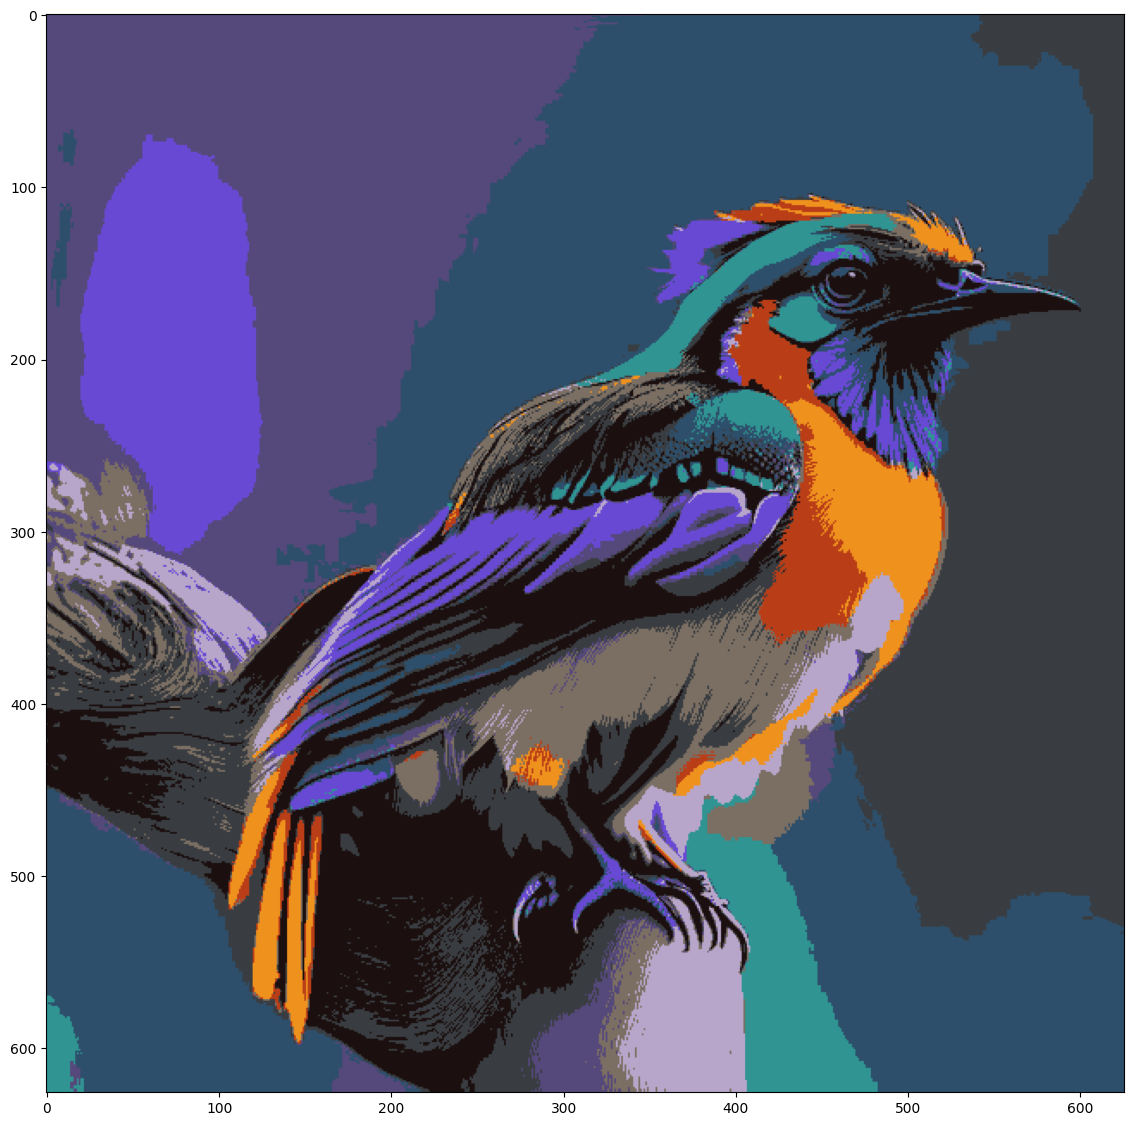

In [7]:
plt.figure(figsize=(14,14))

five_cluster_img = five_cluster_data.reshape((bird_img.shape[0], bird_img.shape[1], 3))
plt.imshow(five_cluster_img)

plt.show()

plt.figure(figsize=(14,14))

ten_cluster_img = ten_cluster_data.reshape((bird_img.shape[0], bird_img.shape[1], 3))
plt.imshow(ten_cluster_img)

plt.show()


#### f) Compute the MSE (using scikit-learn) between the original normalized image and the recolored image, for each K. Comment on the results.

In [8]:
five_cluster_mse = mean_squared_error(bird_img.reshape((-1, 3)), five_cluster_img.reshape((-1, 3)))
print(f"[Assignment 4]: The MSE for 5 clusters is {five_cluster_mse:.4f}")

ten_cluster_mse = mean_squared_error(bird_img.reshape((-1, 3)), ten_cluster_img.reshape((-1, 3)))
print(f"[Assignment 4]: The MSE for 10 clusters is {ten_cluster_mse:.4f}")


[Assignment 4]: The MSE for 5 clusters is 0.0110
[Assignment 4]: The MSE for 10 clusters is 0.0061


- For the K means clustering @ 5 and 10 clusters, the results show that 10 clusters has an MSE closer to 0. This means that the more clusters we use, the closer to the original image the clustered image will match.